In [3]:
import pandas as pd

## Display all colunms
pd.pandas.set_option("display.max_columns",None)

df = pd.read_csv("F:\project1\sklearn-Diabets-Deployment\datasets\Processed_breast_cancer_data.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.98,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.586,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6655,0.7120,0.2654,0.4601,0.11890,malignant
1,20.56,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7340,3.398,74.06,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.98,23.40,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7870,4.586,94.00,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.56,25.53,152.5,1709.0,0.1444,0.4246,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.56,386.0,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.9,567.5,0.2098,0.8660,0.6870,0.2575,0.6638,0.17300,malignant
4,20.30,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7573,0.7812,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.55,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [5]:
df_copy = df.copy()

## EDA (Exploratory Data Analysis)

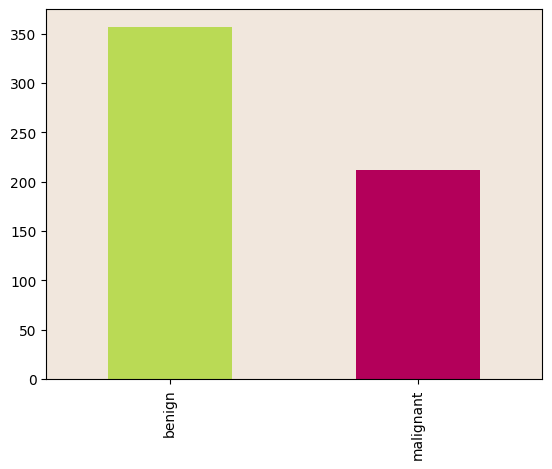

In [19]:
import matplotlib.pyplot as plt

# Generate the bar plot with custom colors
colors = ['#bada55', '#b3005a']  # Replace with your desired colors
ax = df_copy["target"].value_counts().plot(kind='bar', color=colors)
ax.set_facecolor('#f1e7dd')

# Show the plot
plt.show()


In [22]:
df_copy["target"].value_counts()

benign       357
malignant    212
Name: target, dtype: int64

##  Datasets is significantly balanced one .

## Ploting all density plot against two target class

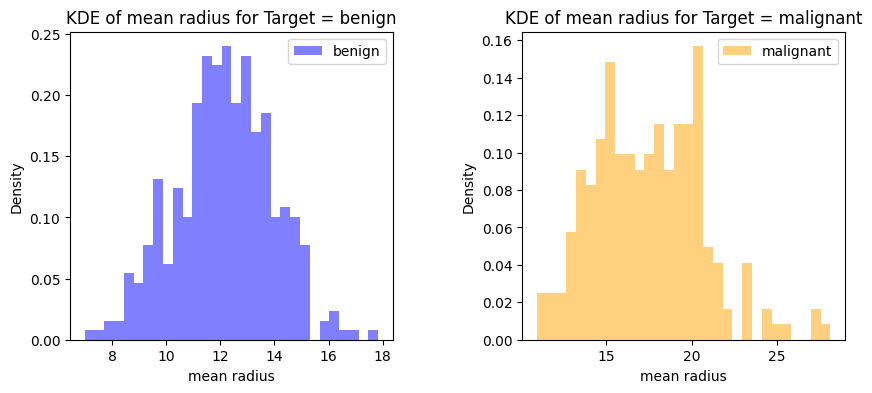

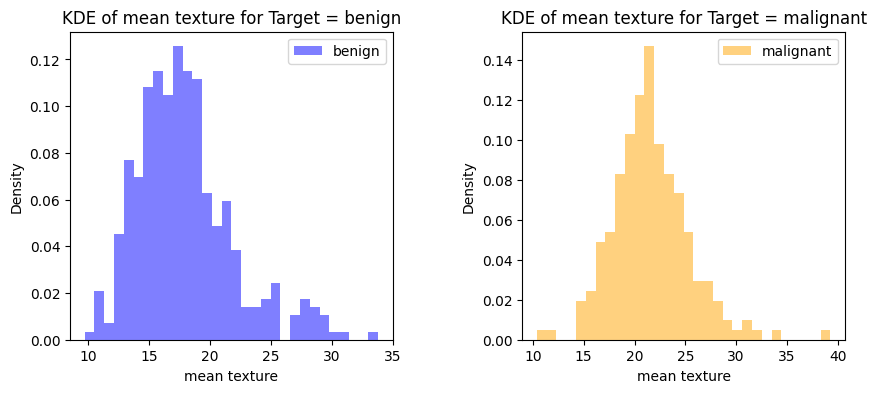

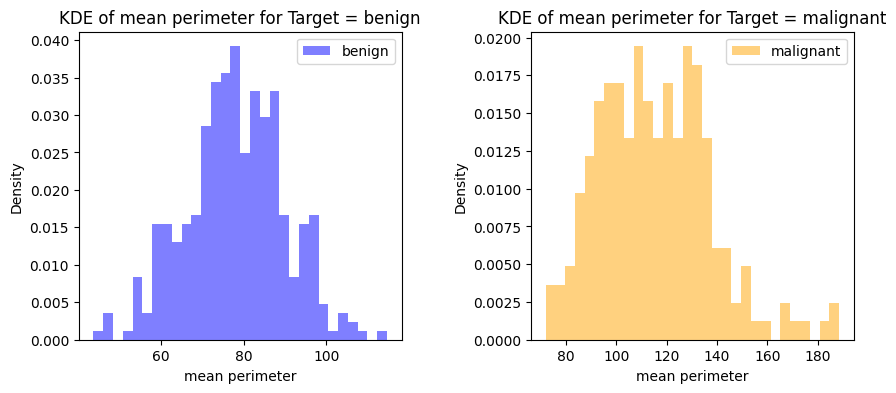

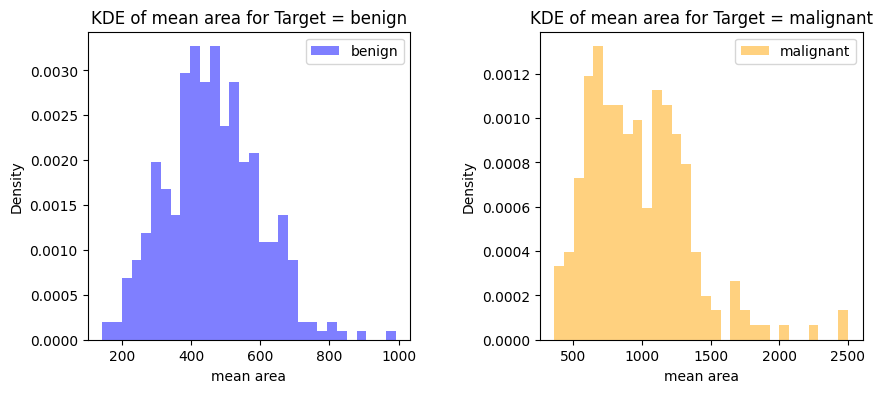

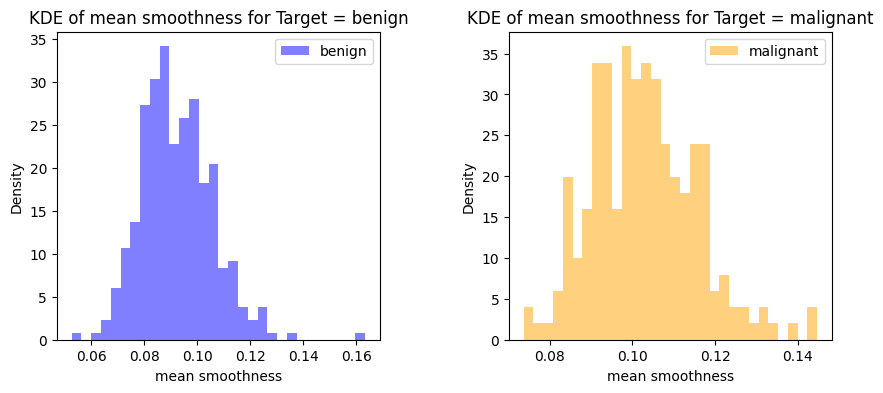

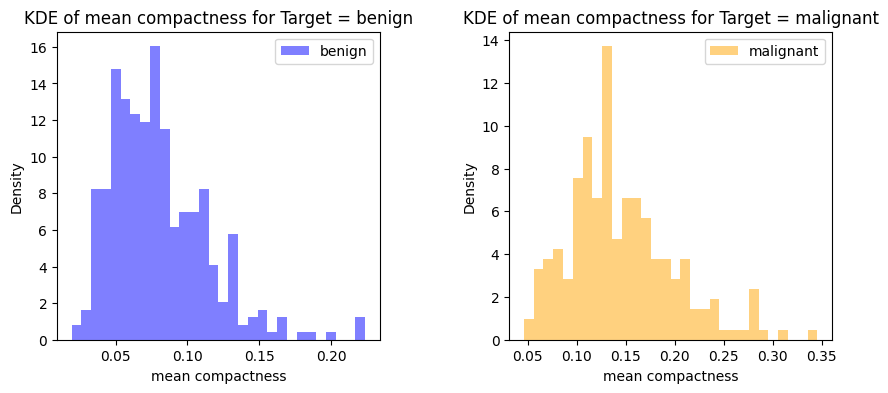

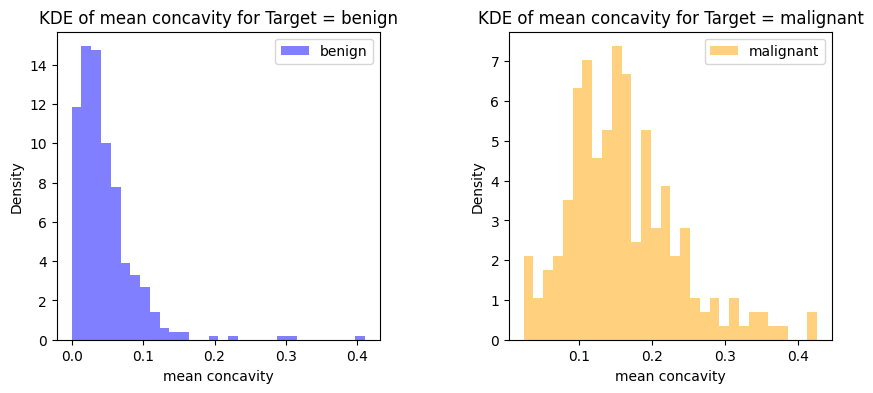

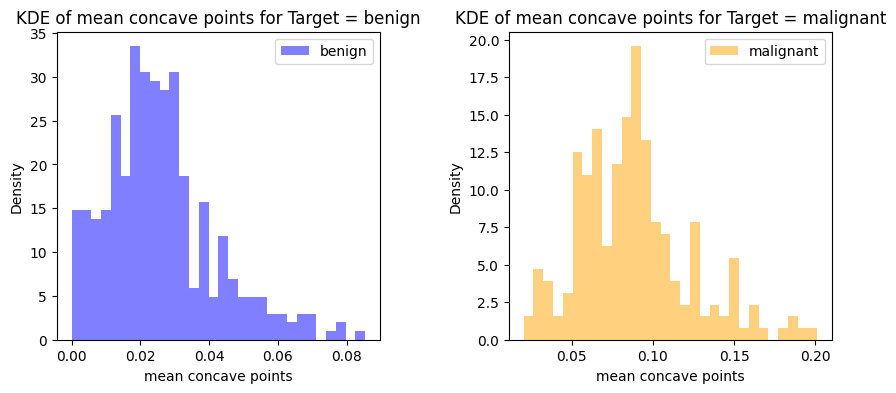

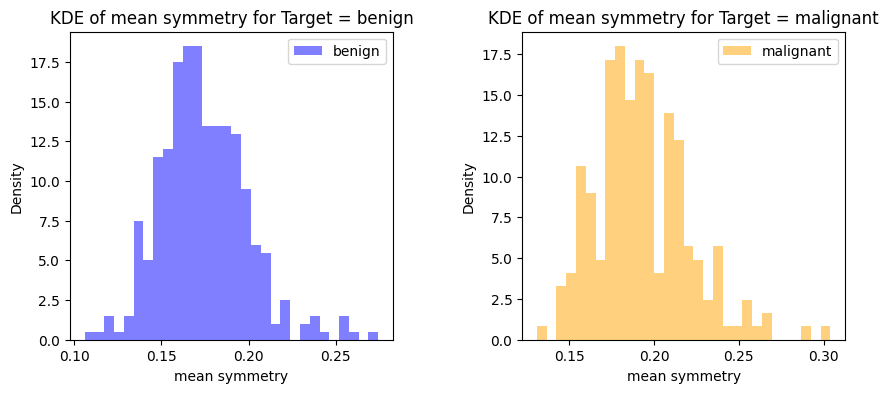

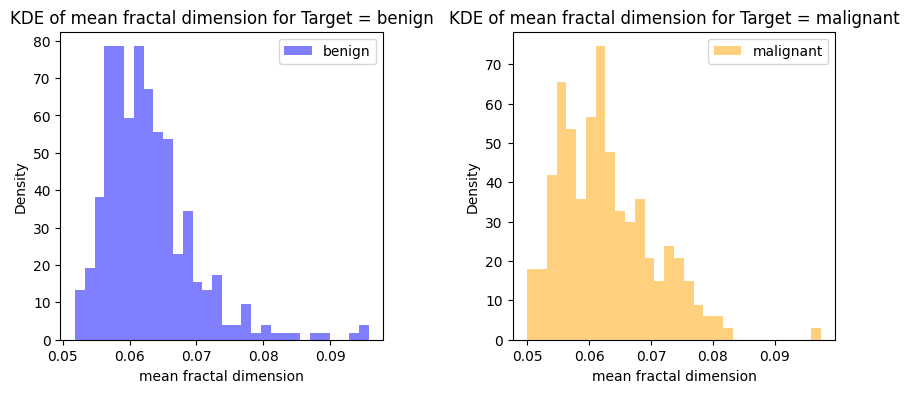

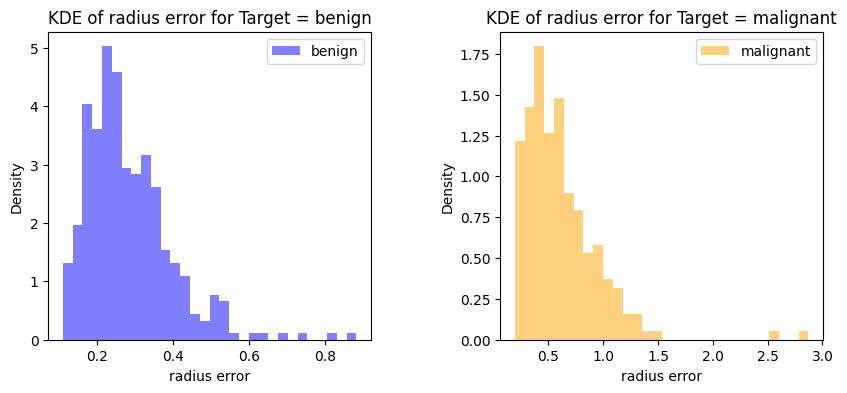

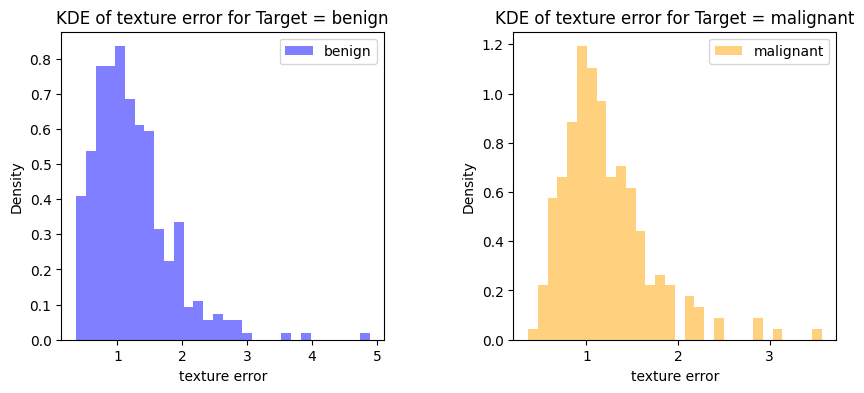

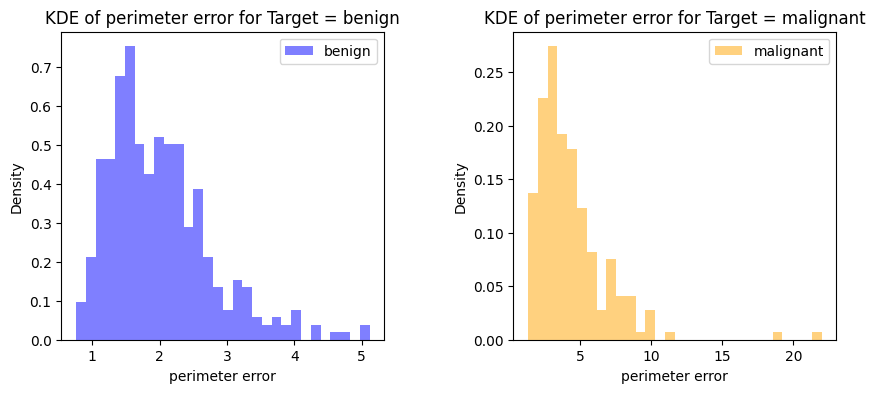

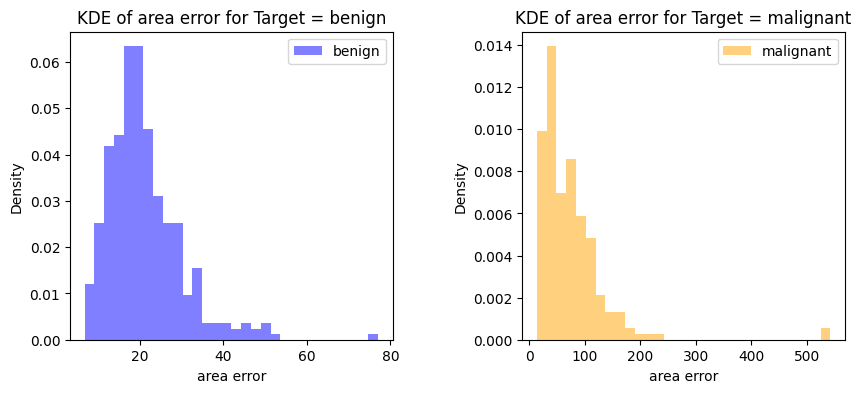

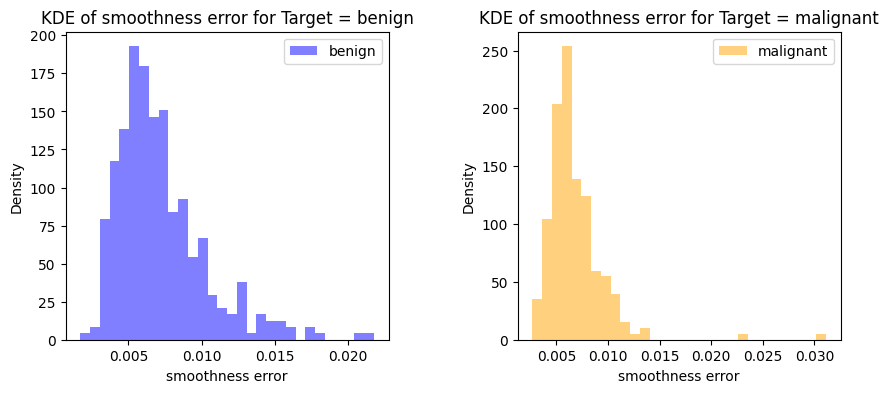

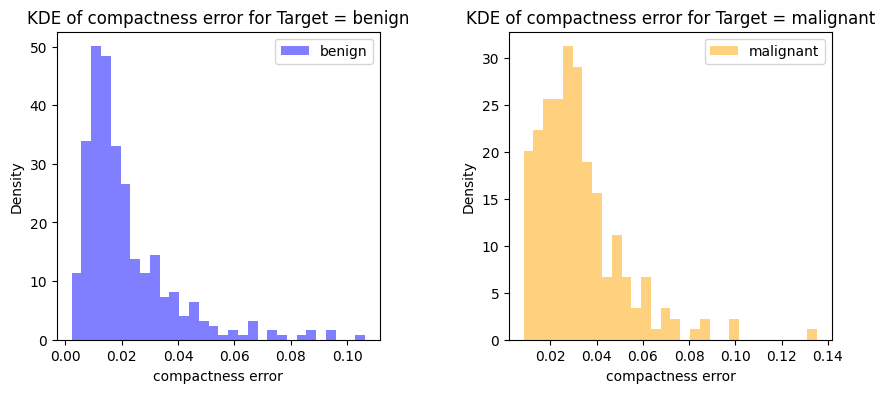

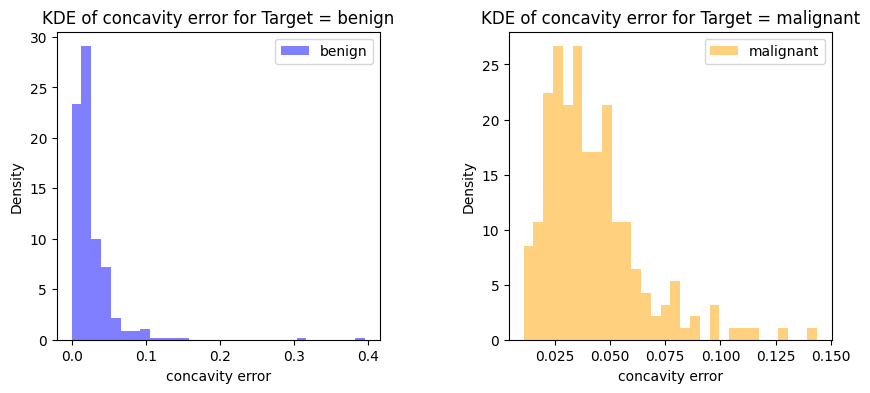

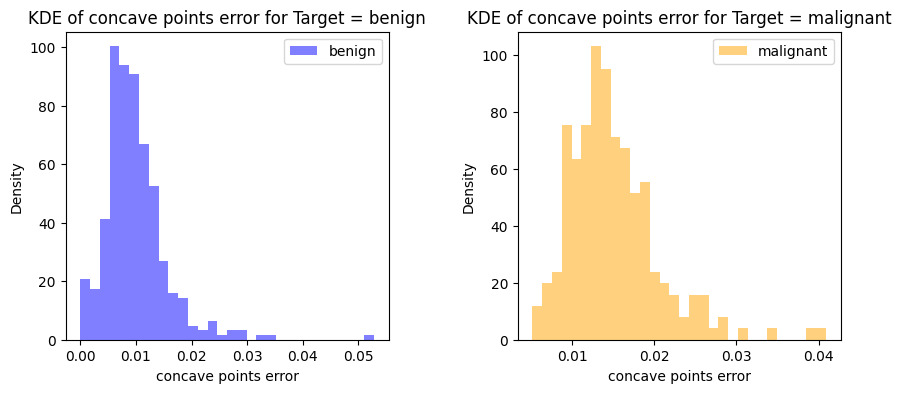

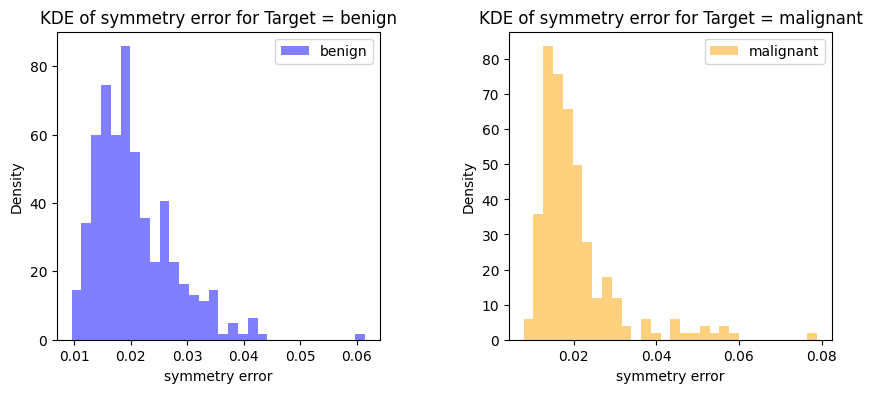

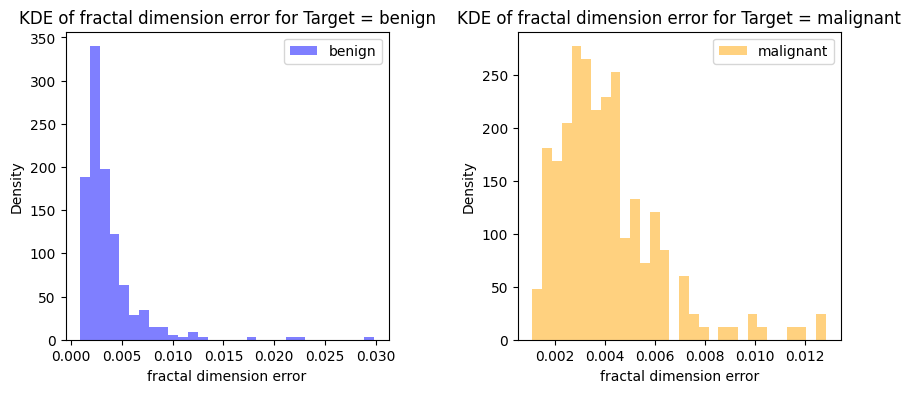

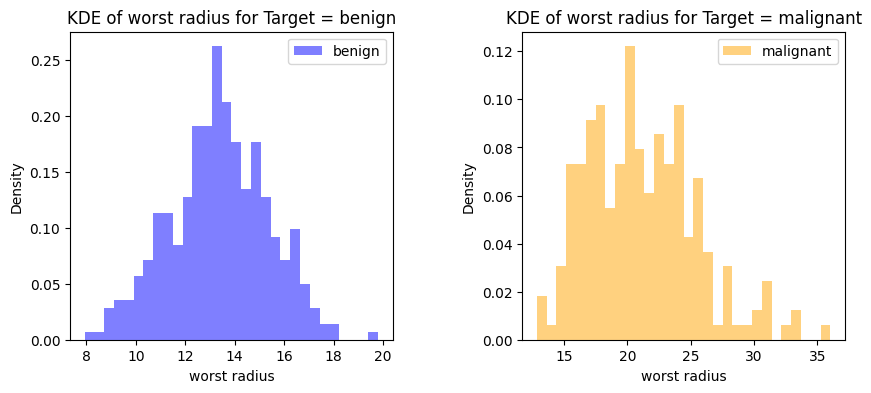

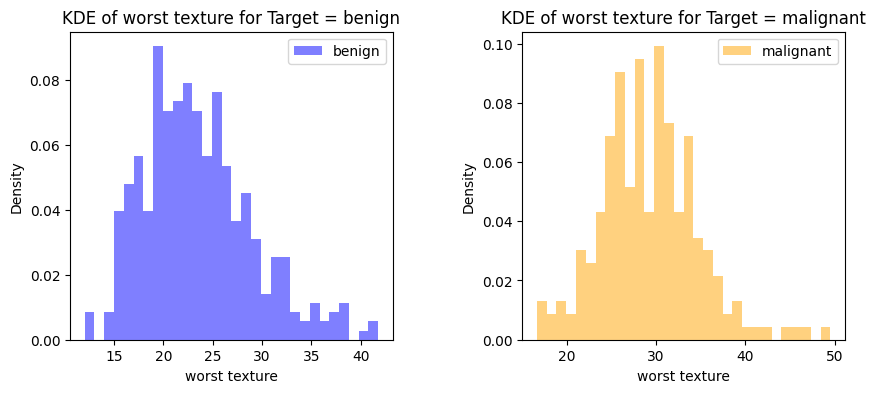

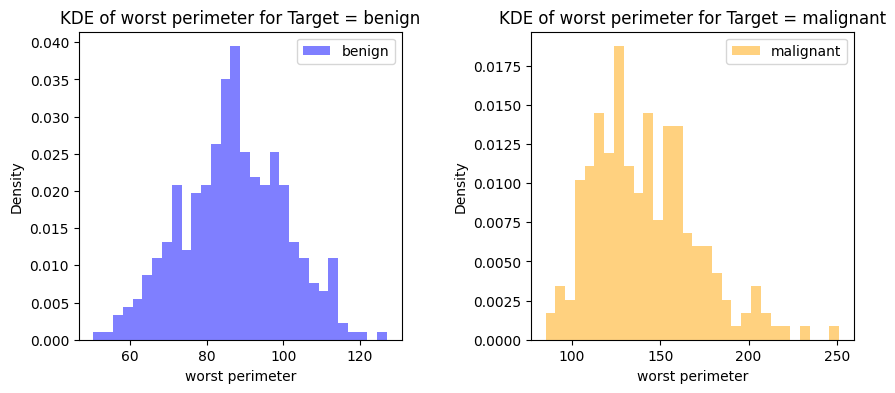

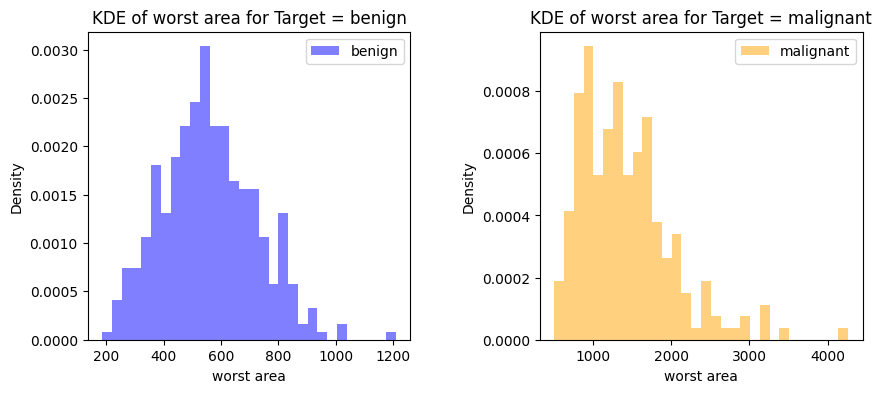

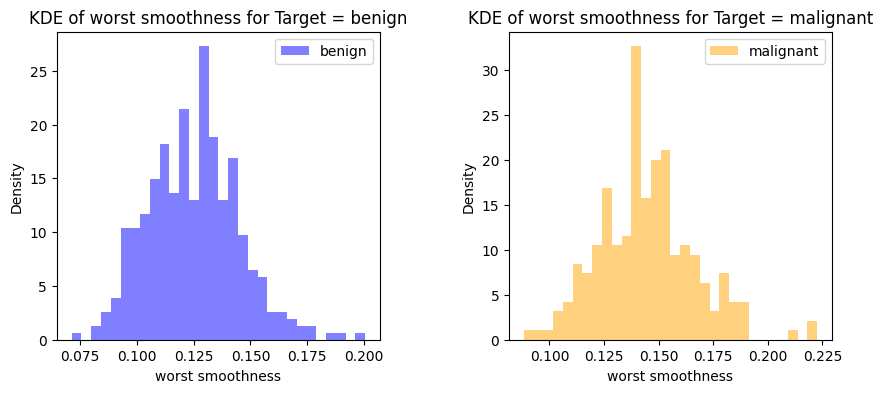

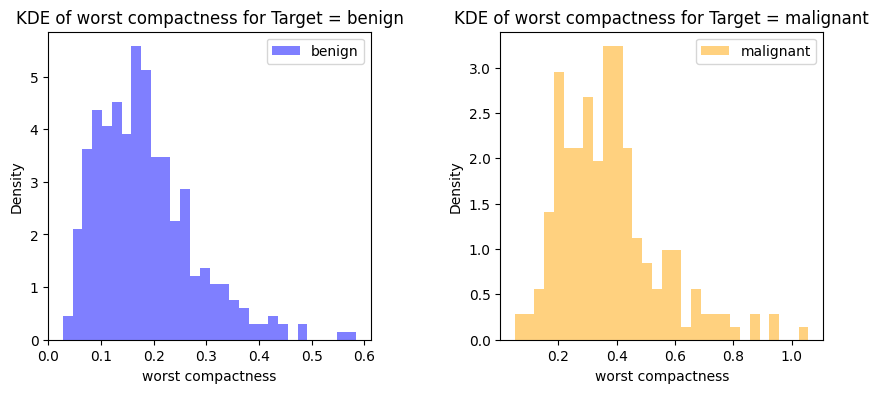

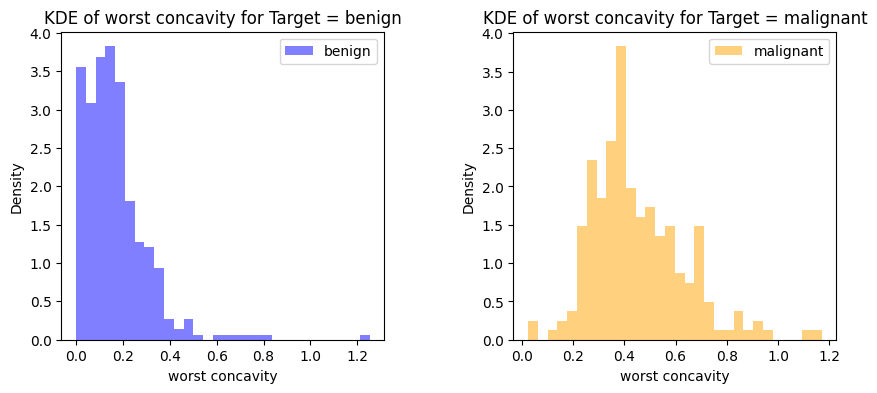

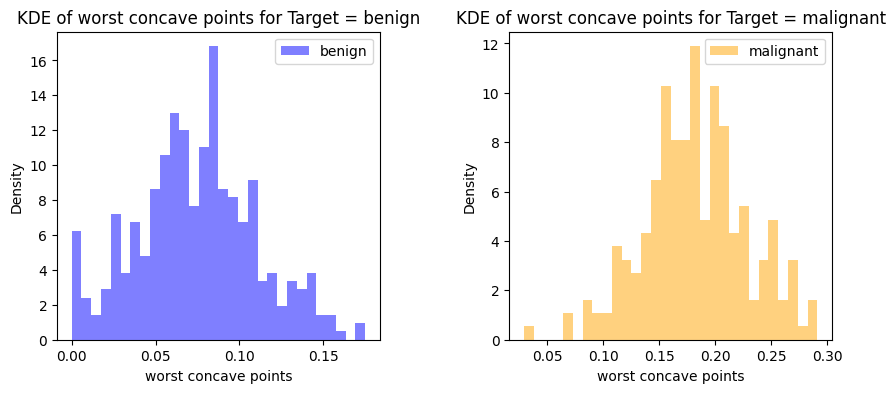

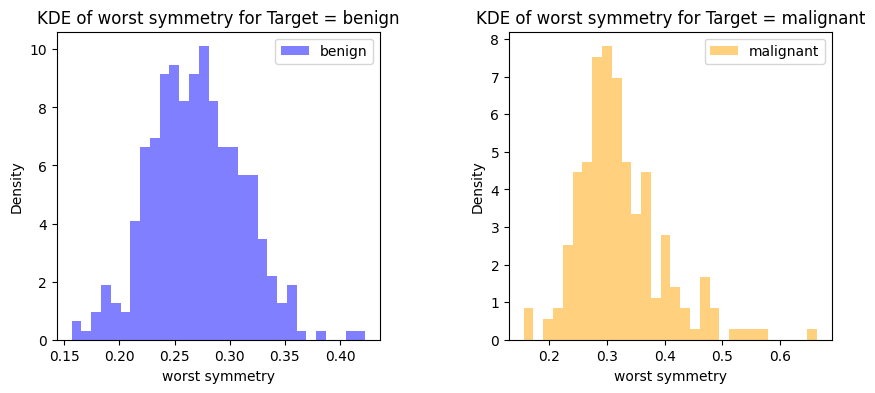

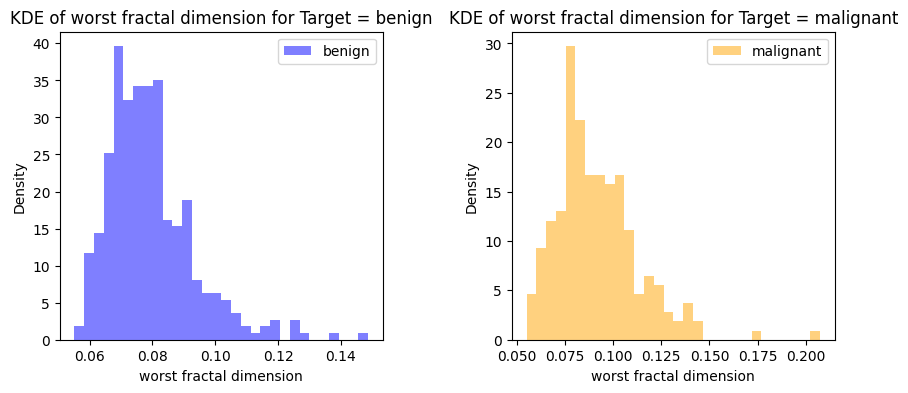

In [70]:
# Iterate over the columns
for column in  [f for f in df_copy.columns if f != "target"]:
    # Create subplots for each column
    plt.figure(figsize=(10, 4))
    
    # Plot the KDE for the first target class
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
    plt.title(f'KDE of {column} for Target = benign')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.hist(df_copy[df_copy['target'] == 'benign'][column], bins=30, density=True, alpha=0.5, color='blue', label='benign')
    plt.legend()
    
    # Plot the KDE for the second target class
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
    plt.title(f'KDE of {column} for Target = malignant')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.hist(df_copy[df_copy['target'] == 'malignant'][column], bins=30, density=True, alpha=0.5, color='orange', label='malignant')
    plt.legend()
    
    # Adjust the spacing between plots
    plt.subplots_adjust(wspace=0.4)
    
    # Display the plots
    plt.show()


## All continuous feature are not normally distributed

In [69]:
import scipy.stats as stats

# List to store normally distributed features
normally_distributed_features = []

# Iterate over the columns
for column in [f for f in df_copy.columns if f != "target"]:
    # Perform Shapiro-Wilk test on each target class
    benign_data = df_copy[df_copy['target'] == 'benign'][column]
    malignant_data = df_copy[df_copy['target'] == 'malignant'][column]
    
    # Check if data from both target classes are normally distributed
    benign_normal = stats.shapiro(benign_data)[1] > 0.05
    malignant_normal = stats.shapiro(malignant_data)[1] > 0.05
    
    if benign_normal and malignant_normal:
        normally_distributed_features.append(column)

# Print the normally distributed features
print("Normally Distributed Features:")
for feature in normally_distributed_features:
    print(feature)


Normally Distributed Features:


# No features are normaly distributed

## Plot boxplot of each target classes side by side

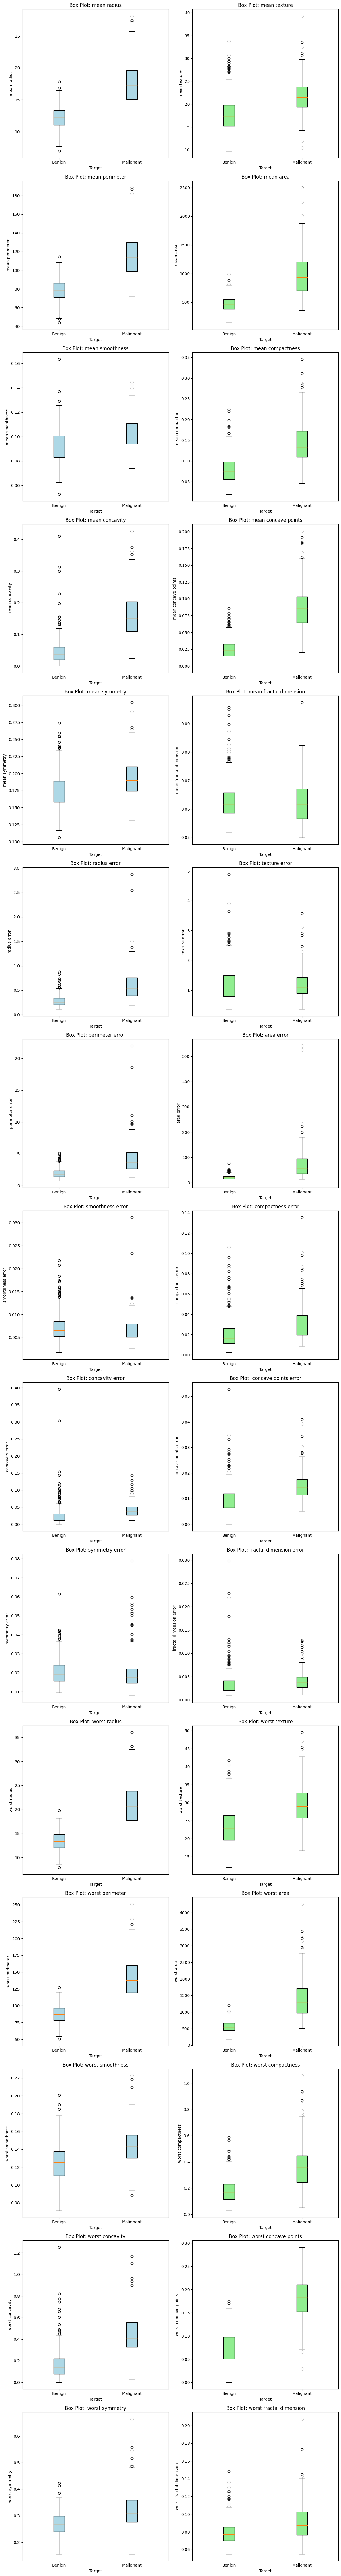

In [84]:
import matplotlib.pyplot as plt

# Create separate datasets for each target class
benign_data = df_copy[df_copy['target'] == 'benign']
malignant_data = df_copy[df_copy['target'] == 'malignant']

# Get the list of features
features = [f for f in df_copy.columns if f != "target"]

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_rows = (num_features + 1) // 2  # Round up to the nearest integer

# Define colors for each box plot
colors = ['lightblue', 'lightgreen']

# Plotting box plots for each feature
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    ax.boxplot([benign_data[feature], malignant_data[feature]], patch_artist=True, boxprops=dict(facecolor=colors[i%2]))
    ax.set_xticklabels(['Benign', 'Malignant'])
    ax.set_xlabel('Target')
    ax.set_ylabel(feature)
    ax.set_title('Box Plot: {}'.format(feature))

# Remove any unused subplots
if num_features < len(axs):
    for j in range(num_features, len(axs)):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## from above we can see that every feature having outliers

## Imputation of Outlier by KNN

In [93]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Create a copy of the DataFrame to perform imputation
df_imputed = df_copy.copy()

# Select the features to impute outliers
features_to_impute = [f for f in df_imputed.columns if f != "target"]

# Define the number of neighbors for the KNN approach
k = 5

# Iterate over each feature
for feature in features_to_impute:
    data = df_imputed[feature].values.reshape(-1, 1)
    
    # Fit the KNN model
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(data)
    
    # Find the k nearest neighbors for each data point
    distances, indices = knn.kneighbors(data)
    
    # Calculate the mean of the k nearest neighbors for each data point
    means = np.mean(data[indices], axis=1)
    
    # Replace outliers with the mean of their k nearest neighbors
    outliers = np.abs(data - means) > 2 * np.std(data)
    df_imputed.loc[outliers[:, 0], feature] = means[outliers[:, 0]]

# Plot the box plots for each feature using the updated df_imputed DataFrame
# (Use the code provided in the previous response)
df_imputed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.98,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.586,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6655,0.7120,0.2654,0.4601,0.11890,malignant
1,20.56,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7340,3.398,74.06,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.98,23.40,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7870,4.586,94.00,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.56,25.53,152.5,1709.0,0.1444,0.4246,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.56,386.0,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.9,567.5,0.2098,0.8660,0.6870,0.2575,0.6638,0.17300,malignant
4,20.30,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7573,0.7812,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.55,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


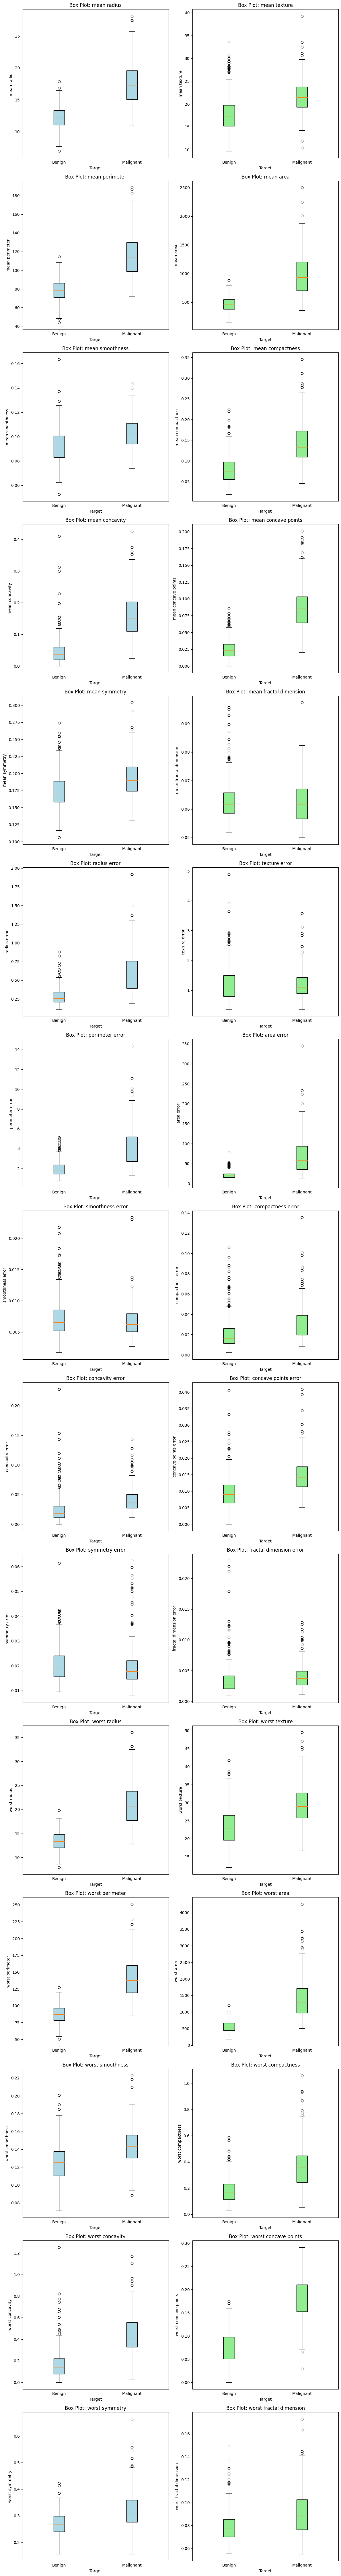

In [96]:
benign_data = df_imputed[df_imputed['target'] == 'benign']
malignant_data = df_imputed[df_imputed['target'] == 'malignant']

# Get the list of features
features = [f for f in df_imputed.columns if f != "target"]

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_rows = (num_features + 1) // 2  # Round up to the nearest integer

# Define colors for each box plot
colors = ['lightblue', 'lightgreen']

# Plotting box plots for each feature
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    ax.boxplot([benign_data[feature], malignant_data[feature]], patch_artist=True, boxprops=dict(facecolor=colors[i%2]))
    ax.set_xticklabels(['Benign', 'Malignant'])
    ax.set_xlabel('Target')
    ax.set_ylabel(feature)
    ax.set_title('Box Plot: {}'.format(feature))

# Remove any unused subplots
if num_features < len(axs):
    for j in range(num_features, len(axs)):
        fig.delaxes(axs[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## Now effect of outlier decrease in each features

In [99]:
df_imputed["target"].unique()

array(['malignant', 'benign'], dtype=object)

In [101]:
df_imputed['target'] = df_imputed['target'].replace({ 'malignant': 0 ,'benign': 1})
df_imputed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.98,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.586,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6655,0.7120,0.2654,0.4601,0.11890,0
1,20.56,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7340,3.398,74.06,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.98,23.40,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7870,4.586,94.00,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.56,25.53,152.5,1709.0,0.1444,0.4246,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.56,386.0,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.9,567.5,0.2098,0.8660,0.6870,0.2575,0.6638,0.17300,0
4,20.30,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7573,0.7812,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.55,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [107]:
df_imputed.to_csv('F:\\project1\\sklearn-Diabets-Deployment\\datasets\\transformed_data.csv', index=False)
